# ***Image Classification with CNN on CIFAR-10***

This notebook demonstrates how to build, train, and evaluate a Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset.

**CIFAR-10 Dataset Overview:**
- 60,000 32x32 color images
- 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
- 6,000 images per class (5,000 training + 1,000 testing)

## Import Required Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import classification_report
import seaborn as sns

## Load and Explore the Dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
print("y_train shape:", y_train.shape)
print("First 5 labels:", y_train[:5])
print("Unique classes:", np.unique(y_train))

y_train shape: (50000, 1)
First 5 labels: [[6]
 [9]
 [9]
 [4]
 [1]]
Unique classes: [0 1 2 3 4 5 6 7 8 9]


## Normalize pixel values to be between 0 and 1


*   Convert image features to a 0-1 scale, from a 0-255 scale, by dividing with the maximum (255)

*   Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network.




In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Explore the dataset
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


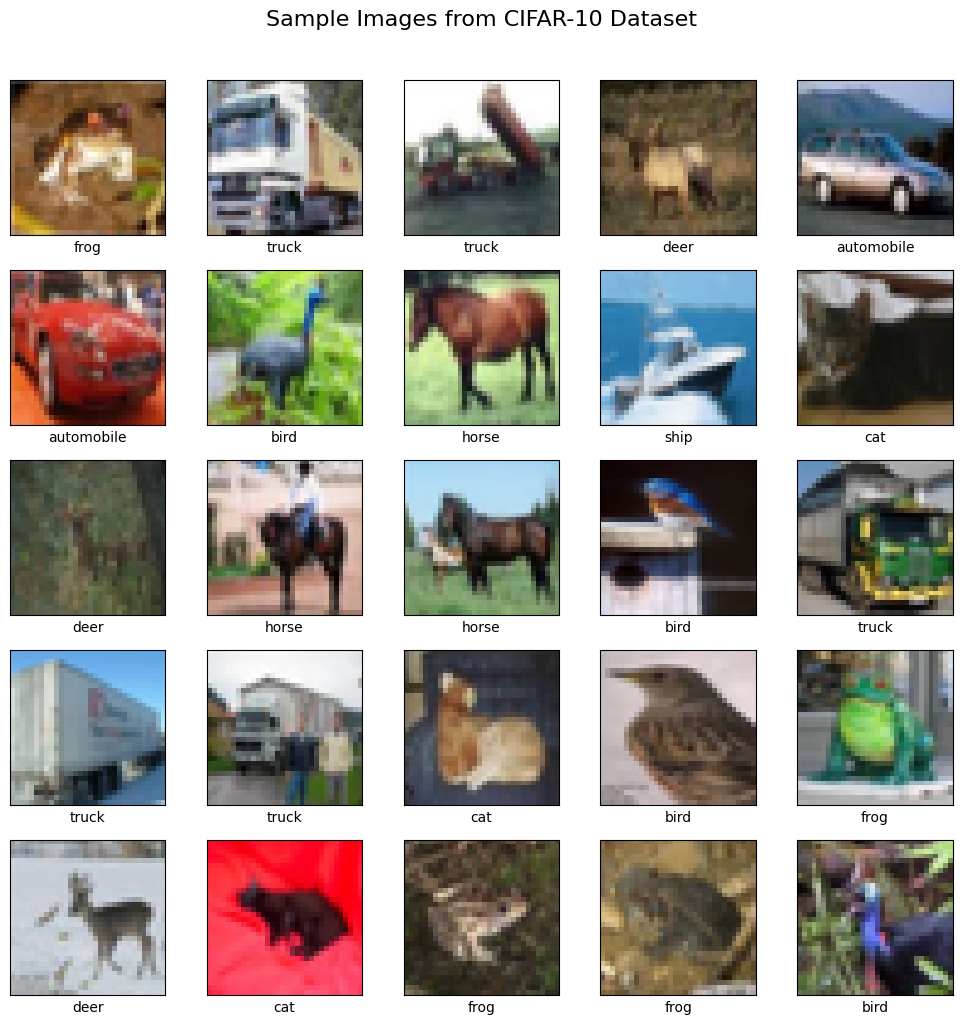

In [ ]:
# Display grid of sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.suptitle('Sample Images from CIFAR-10 Dataset', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Build the ANN Model

In [ ]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Display model architecture
ann_model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile ANN
ann_model.compile(optimizer='adam',
                 loss= 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
ann_history = ann_model.fit(X_train, y_train, epochs=10,validation_split=0.3)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2677 - loss: 2.0356 - val_accuracy: 0.3701 - val_loss: 1.7533
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3769 - loss: 1.7404 - val_accuracy: 0.3913 - val_loss: 1.6933
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4042 - loss: 1.6568 - val_accuracy: 0.4231 - val_loss: 1.6273
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4372 - loss: 1.5735 - val_accuracy: 0.3992 - val_loss: 1.6712
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.4481 - loss: 1.5521 - val_accuracy: 0.4362 - val_loss: 1.5798
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4609 - loss: 1.5166 - val_accuracy: 0.4398 - val_loss: 1.5850
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.4602 - loss: 1.4981 - val_accuracy: 0.4553 - val_loss: 1.5334
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4755 -

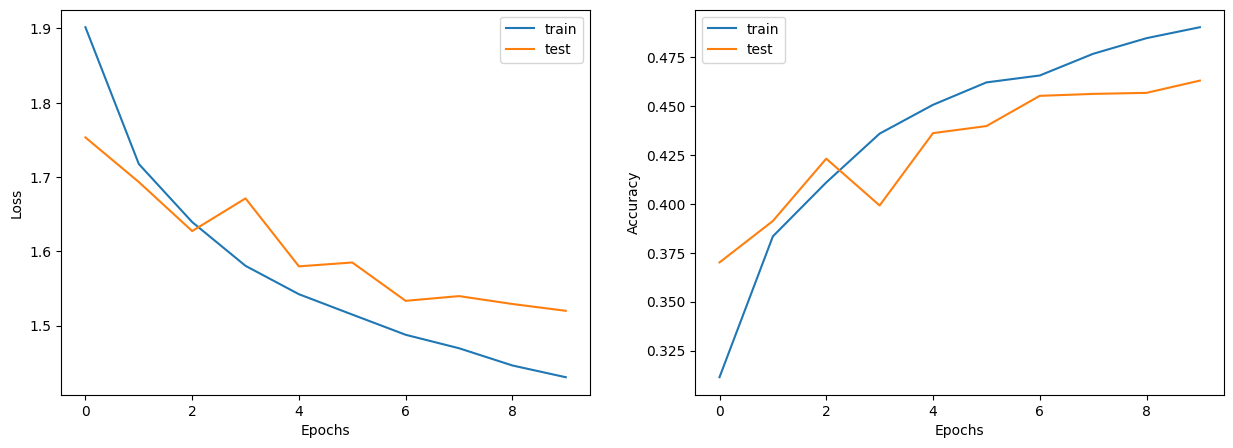

In [ ]:
figure, axis = plt.subplots(ncols=2, figsize=(15,5))
axis[0].plot(ann_history.history['loss'])
axis[0].plot(ann_history.history['val_loss'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend(['train','test'])
axis[1].plot(ann_history.history['accuracy'])
axis[1].plot(ann_history.history['val_accuracy'])
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend(['train','test'])
plt.show()

In [ ]:
train_evaluation =ann_model.evaluate(X_train, y_train)
test_evaluation= ann_model.evaluate(X_test, y_test)
print("-"*80)
print(f"Train Loss = {train_evaluation[0]}, Train Accuracy = {train_evaluation[1]}")
print("-"*80)
print(f"Test Loss = {test_evaluation[0]}, Test Accuracy = {test_evaluation[1]}")
print("-"*80)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5066 - loss: 1.3856
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4628 - loss: 1.4958
--------------------------------------------------------------------------------
Train Loss = 1.4221951961517334, Train Accuracy = 0.4944800138473511
--------------------------------------------------------------------------------
Test Loss = 1.5021042823791504, Test Accuracy = 0.4618000090122223
--------------------------------------------------------------------------------


In [ ]:
pred = ann_model.predict(X_test)
predictions = np.argmax(pred, axis=1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([3, 8, 0, ..., 3, 2, 7])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.49      0.56      0.52      1000
           1       0.50      0.71      0.59      1000
           2       0.32      0.39      0.35      1000
           3       0.33      0.35      0.34      1000
           4       0.38      0.39      0.38      1000
           5       0.45      0.25      0.32      1000
           6       0.53      0.45      0.49      1000
           7       0.56      0.52      0.54      1000
           8       0.56      0.59      0.58      1000
           9       0.56      0.41      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



Text(50.722222222222214, 0.5, 'Actual')

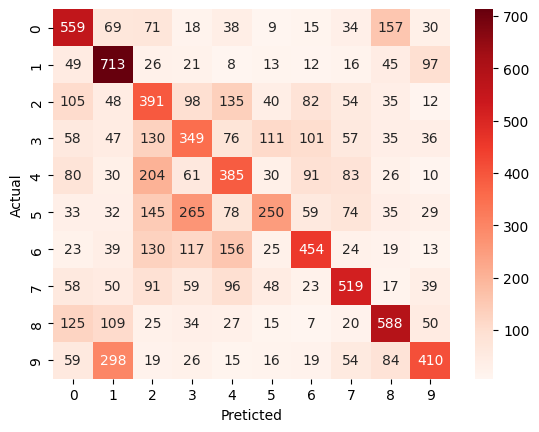

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Preticted')
plt.ylabel('Actual')

## Implementing a better CNN model architecture

### Data augmentation



*   One of the major reasons for overfitting is that you don’t have enough data to train your network.

*   Apart from regularization, another very effective way to counter Overfitting is Data Augmentation.

*   It is the process of artificially creating more images from the images you already have by changing the size, orientation etc of the image.

*   This can be done in Keras using the **ImageDataGenerator** instance.


*  **Includes rotation of the image, shifting the image left/right/top/bottom by some amount, flip the image horizontally or vertically, shear or zoom the image etc.**

*   Augmentation has a **regularizing effect**. Too much of this combined with other forms of regularization (weight L2, dropout, etc.) can cause the net to **underfit**.








In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    validation_split=0.3
)
datagen.fit(X_train)

### CNN model architecture

In [ ]:
from tensorflow.keras import layers, regularizers
# Build CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(0.001),
                  input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
# Display model architecture
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,253,674 (4.78 MB)

 Trainable params: 1,252,266 (4.78 MB)

 Non-trainable params: 1,408 (5.50 KB)

## Compile and Train the Model

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
cnn_history = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=64, subset='training'),
    validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 228s 406ms/step - accuracy: 0.3103 - loss: 3.3094 - val_accuracy: 0.3384 - val_loss: 2.9138
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 222s 405ms/step - accuracy: 0.4798 - loss: 2.2494 - val_accuracy: 0.5245 - val_loss: 1.9503
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 264s 410ms/step - accuracy: 0.5528 - loss: 1.8500 - val_accuracy: 0.5792 - val_loss: 1.7015
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 220s 402ms/step - accuracy: 0.5979 - loss: 1.6523 - val_accuracy: 0.5851 - val_loss: 1.6552
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 236s 431ms/step - accuracy: 0.6235 - loss: 1.5525 - val_accuracy: 0.5823 - val_loss: 1.6694
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 234s 428ms/step - accuracy: 0.6373 - loss: 1.5236 - val_accuracy: 0.5819 - val_loss: 1.7008
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 218s 399ms/step - accuracy: 0.6509 - loss: 1.4951 - val_accuracy: 0.6021 - val_loss: 1.6386
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 215s 394ms/step - accuracy: 0.6533 - loss: 1.48

## Analyzing model performance

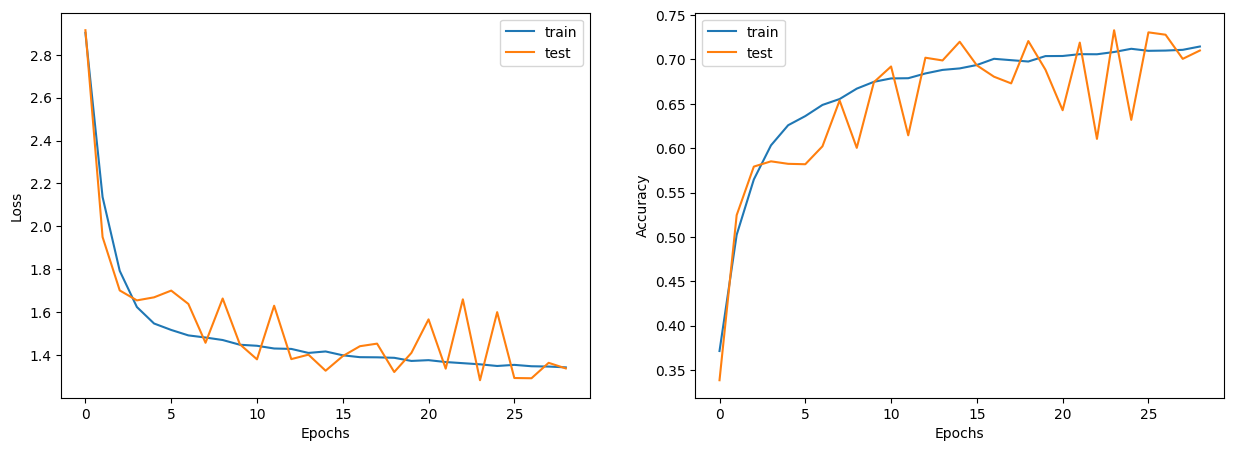

In [ ]:
figure, axis = plt.subplots(ncols=2, figsize=(15,5))
axis[0].plot(cnn_history.history['loss'])
axis[0].plot(cnn_history.history['val_loss'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend(['train','test'])
axis[1].plot(cnn_history.history['accuracy'])
axis[1].plot(cnn_history.history['val_accuracy'])
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend(['train','test'])
plt.show()

In [ ]:
train_evaluation =cnn_model.evaluate(X_train, y_train)
test_evaluation= cnn_model.evaluate(X_test, y_test)
print("-"*80)
print(f"Train Loss = {train_evaluation[0]}, Train Accuracy = {train_evaluation[1]}")
print("-"*80)
print(f"Test Loss = {test_evaluation[0]}, Test Accuracy = {test_evaluation[1]}")
print("-"*80)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7287 - loss: 1.3315
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7233 - loss: 1.3842
--------------------------------------------------------------------------------
Train Loss = 1.3207550048828125, Train Accuracy = 0.7321000099182129
--------------------------------------------------------------------------------
Test Loss = 1.3728601932525635, Test Accuracy = 0.7239000201225281
--------------------------------------------------------------------------------


In [ ]:
pred = cnn_model.predict(X_test)
predictions = np.argmax(pred, axis=1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


array([3, 8, 1, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1000
           1       0.89      0.86      0.88      1000
           2       0.71      0.60      0.65      1000
           3       0.71      0.43      0.54      1000
           4       0.79      0.57      0.66      1000
           5       0.76      0.63      0.69      1000
           6       0.56      0.93      0.70      1000
           7       0.91      0.64      0.75      1000
           8       0.80      0.89      0.84      1000
           9       0.59      0.95      0.73      1000

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.72     10000
weighted avg       0.75      0.72      0.72     10000



Text(50.722222222222214, 0.5, 'Actual')

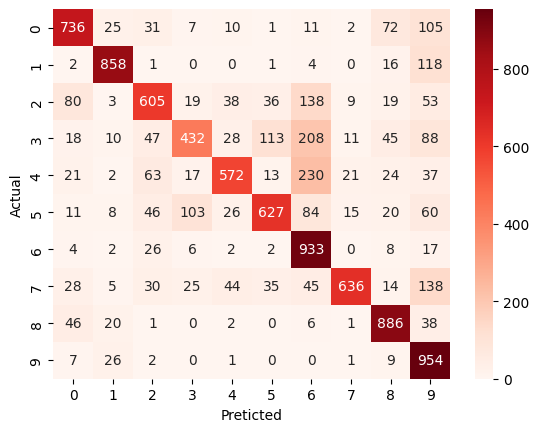

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Preticted')
plt.ylabel('Actual')